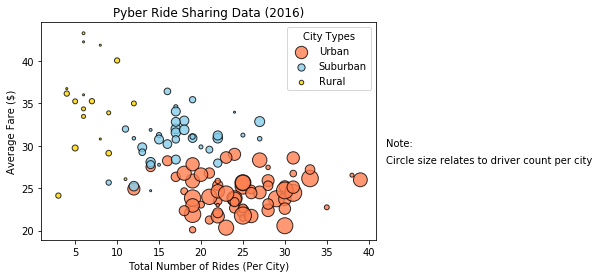

In [14]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

City = pd.read_csv('city_data.csv')
Ride = pd.read_csv('ride_data.csv')

Merge_df = pd.merge(City,Ride,on="city")
#getting the relevant statistics
Fares_df = Merge_df.groupby(["city","type","driver_count"],as_index=False)[["fare"]].mean()
Rides_df = Merge_df.groupby(["city","type","driver_count"],as_index=False)[["fare"]].count()

Rides = Rides_df.rename(columns={"fare":"rides"})

Fares_df["rides"] = Rides["rides"]

FSplit = dict(tuple(Fares_df.groupby("type")))

fig, ax = plt.subplots()
ax.scatter(FSplit["Urban"]["rides"], FSplit["Urban"]["fare"], FSplit["Urban"]["driver_count"]*4, edgecolors='black', c='Coral', label = 'Urban',alpha=0.8)
ax.scatter(FSplit["Suburban"]["rides"], FSplit["Suburban"]["fare"], FSplit["Suburban"]["driver_count"]*4, edgecolors='black', c='SkyBlue', label = 'Suburban',alpha=0.8)
ax.scatter(FSplit["Rural"]["rides"], FSplit["Rural"]["fare"], FSplit["Rural"]["driver_count"]*4, edgecolors='black', c='Gold', label = 'Rural',alpha=0.8)

#I spent an hour experimenting with linewidth but nothing changes the scale of the legend circles.  
ax.legend(title="City Types")
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.text(42,30,"Note:")
plt.text(42,28,"Circle size relates to driver count per city")

plt.show()

In [15]:
#Supporting the conclusion section
print(f"The correlation between Average Fare and Number of Rides was {round(np.corrcoef(Fares_df['fare'],Fares_df['rides'])[0,1],3)}")

The correlation between Average Fare and Number of Rides was -0.583


In [16]:
#Pie Graphs Preparation
Pie1 = Merge_df.groupby(["type"],as_index=False)[["fare"]].sum()
Pie2 = Fares_df.groupby(["type"],as_index=False)[["rides"]].sum()
Pie3 = Fares_df.groupby(["type"],as_index=False)[["driver_count"]].sum()

explode = (0.1,0.1,0) 

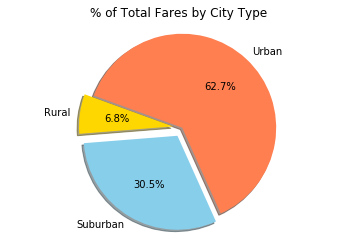

In [17]:
#Fares by city type
plt.pie(Pie1["fare"], explode=explode, labels=Pie1["type"], colors=["Gold","SkyBlue","Coral"],
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.title('% of Total Fares by City Type')
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

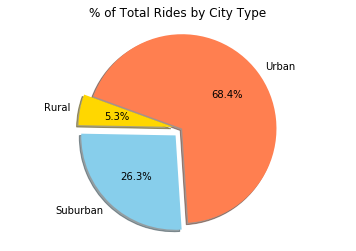

In [18]:
#Rides by City Type
plt.pie(Pie2["rides"], explode=explode, labels=Pie1["type"], colors=["Gold","SkyBlue","Coral"],
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.title('% of Total Rides by City Type')
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

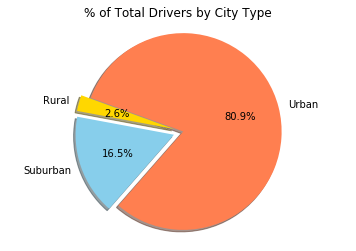

In [19]:
#Drivers by City Type
plt.pie(Pie3["driver_count"], explode=explode, labels=Pie1["type"], colors=["Gold","SkyBlue","Coral"],
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.title('% of Total Drivers by City Type')
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()